In [ ]:
import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [ ]:
(xtr,ytr),(xt,yt)=cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


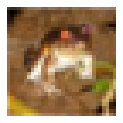

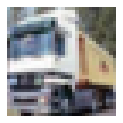

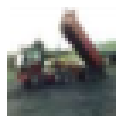

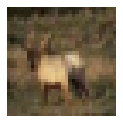

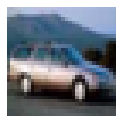

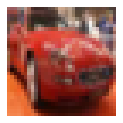

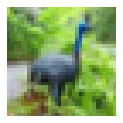

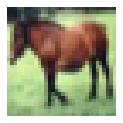

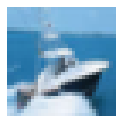

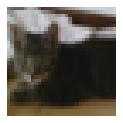

In [ ]:
for i in range(10):
  plt.figure(figsize=(10,2))
  plt.imshow(xtr[i])
  plt.axis('off')
  plt.show()

In [ ]:
ytr[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [ ]:
xtr.shape

(50000, 32, 32, 3)

In [ ]:
ytr.shape

(50000, 1)

In [ ]:
xtr=xtr/255

In [ ]:
xt=xt/255

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [ ]:
cnn=Sequential()

In [ ]:
cnn.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))

In [ ]:
cnn.add(MaxPool2D((2,2)))

In [ ]:
cnn.add(Conv2D(32,kernel_size=(3,3),activation='relu'))

In [ ]:
cnn.add(MaxPool2D((2,2)))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn.add(Flatten())

In [ ]:
cnn.add(Dense(64,activation='relu'))

In [ ]:
cnn.add(Dense(10,activation='softmax'))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 64)                7

In [ ]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
cnn.fit(xtr,ytr,epochs=10,verbose=2)

Epoch 1/10
1563/1563 - 37s - loss: 1.1105 - accuracy: 0.6110 - 37s/epoch - 23ms/step
Epoch 2/10
1563/1563 - 37s - loss: 1.0007 - accuracy: 0.6519 - 37s/epoch - 23ms/step
Epoch 3/10
1563/1563 - 36s - loss: 0.9268 - accuracy: 0.6772 - 36s/epoch - 23ms/step
Epoch 4/10
1563/1563 - 37s - loss: 0.8726 - accuracy: 0.6958 - 37s/epoch - 24ms/step
Epoch 5/10
1563/1563 - 37s - loss: 0.8299 - accuracy: 0.7091 - 37s/epoch - 24ms/step
Epoch 6/10
1563/1563 - 37s - loss: 0.7855 - accuracy: 0.7266 - 37s/epoch - 24ms/step
Epoch 7/10
1563/1563 - 39s - loss: 0.7499 - accuracy: 0.7374 - 39s/epoch - 25ms/step
Epoch 8/10
1563/1563 - 39s - loss: 0.7157 - accuracy: 0.7494 - 39s/epoch - 25ms/step
Epoch 9/10
1563/1563 - 41s - loss: 0.6863 - accuracy: 0.7602 - 41s/epoch - 26ms/step
Epoch 10/10
1563/1563 - 40s - loss: 0.6631 - accuracy: 0.7668 - 40s/epoch - 26ms/step


In [ ]:
cnn.evaluate(xt,yt)

313/313 [==============================] - 3s 9ms/step - loss: 0.9142 - accuracy: 0.6948


[0.914181649684906, 0.6948000192642212]

In [ ]:
pred=cnn.predict(xt)

313/313 [==============================] - 3s 8ms/step


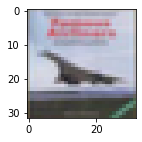

In [ ]:
plt.figure(figsize=(5,2))
plt.imshow(xt[3])

In [ ]:
yt[3]

array([0], dtype=uint8)

In [ ]:
pred[3]

array([9.3426675e-01, 1.1544210e-02, 9.5497025e-04, 7.7299908e-04,
       1.0879872e-04, 1.1529014e-05, 9.0528658e-04, 3.6728675e-06,
       4.5767840e-02, 5.6638480e-03], dtype=float32)

In [ ]:
import numpy as np
np.argmax(pred[3])

0

In [ ]:
y_class=[]

In [ ]:
for i in pred:
  y_class.append(np.argmax(i))

In [ ]:
y_class[3]

0